In [2]:
!wget https://www.salesanalytics.co.jp/591h

--2022-06-30 16:45:52--  https://www.salesanalytics.co.jp/591h
Resolving www.salesanalytics.co.jp (www.salesanalytics.co.jp)... 120.136.14.30
Connecting to www.salesanalytics.co.jp (www.salesanalytics.co.jp)|120.136.14.30|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://www.salesanalytics.co.jp/wp-content/uploads/2021/01/AirPassengers.csv [following]
--2022-06-30 16:45:53--  https://www.salesanalytics.co.jp/wp-content/uploads/2021/01/AirPassengers.csv
Reusing existing connection to www.salesanalytics.co.jp:443.
HTTP request sent, awaiting response... 200 OK
Length: 2322 (2.3K) [text/csv]
Saving to: '591h'

591h                100%[===================>]   2.27K  --.-KB/s    in 0s      

2022-06-30 16:45:53 (738 MB/s) - '591h' saved [2322/2322]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

df = pd.read_csv("./datasets/591h",index_col="Month",parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


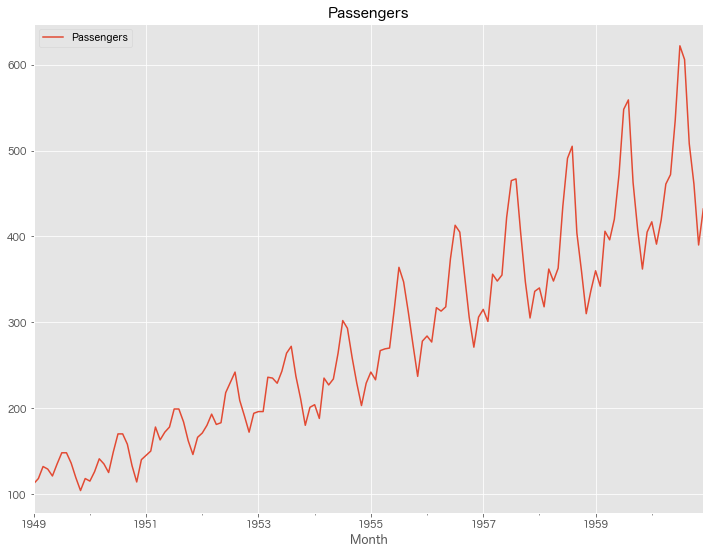

In [5]:
df.plot()
plt.title("Passengers")
plt.show()

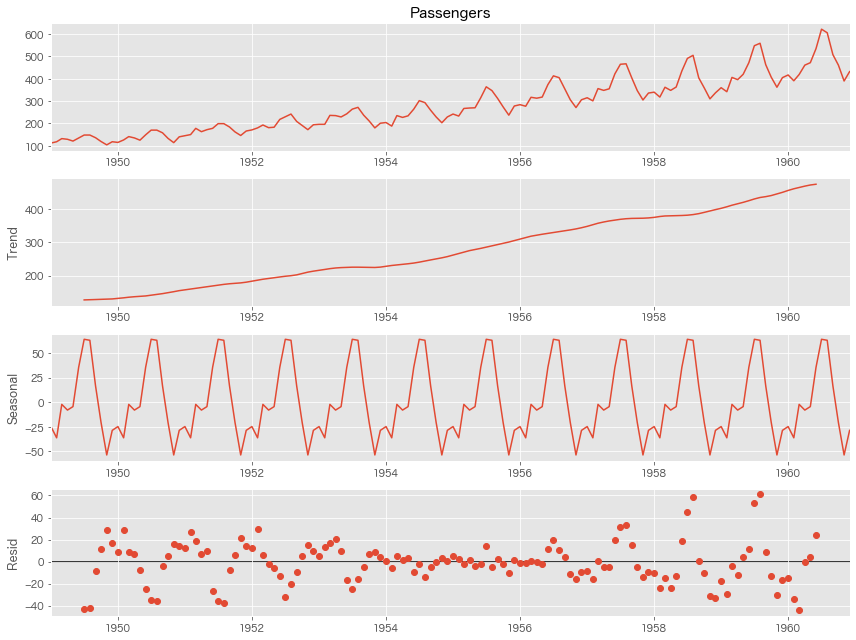

In [12]:
#成分分析: 加法モデル
result = seasonal_decompose(df.Passengers,model="additive",period=12)
result.plot()
plt.show()

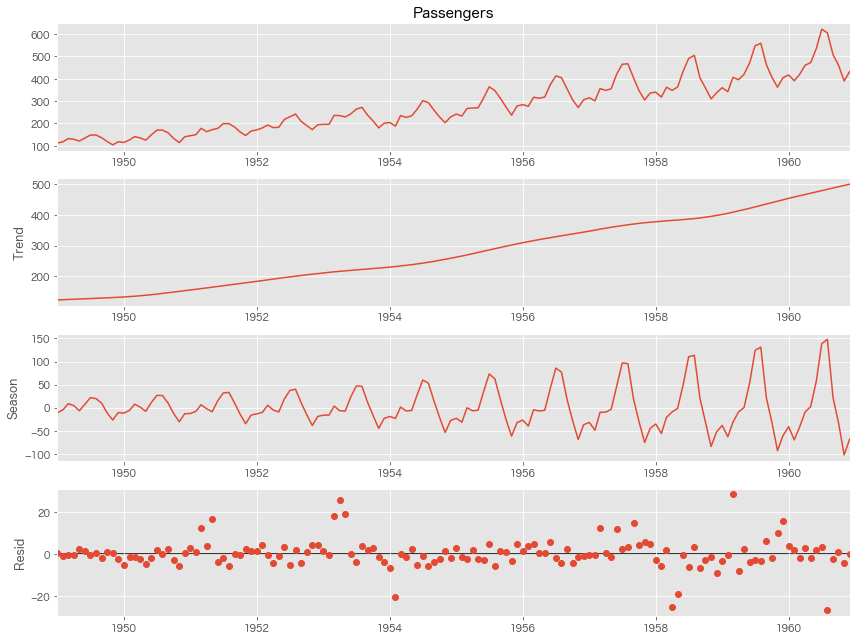

In [13]:
#成分分解: STL分解
stl=STL(df.Passengers, period=12, robust=True).fit()
stl.plot()
plt.show()

In [19]:
#定常性証明
#adf検定
#原系列
dftest = adfuller(df.Passengers)
print("統計量: %f" % dftest[0])
print("P値: %f" % dftest[1])
for k,v in dftest[4].items():
    print("\t", k ,v)

統計量: 0.815369
P値: 0.991880
	 1% -3.4816817173418295
	 5% -2.8840418343195267
	 10% -2.578770059171598


In [20]:
# ライブラリーの読み込み
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定

In [21]:
# 学習データとテストデータ（直近12ヶ月間）に分割
train = df.iloc[:-12, :] #学習データ
test = df.iloc[-12:, :]  #テストデータ

In [22]:
# モデルの学習
SES_model = SimpleExpSmoothing(train)
SES_model_fit = SES_model.fit(smoothing_level=0.5)

/Users/isshintoyonaga/.anyenv/envs/pyenv/versions/anaconda3-2022.05/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [25]:
# テストデータで精度検証
SES_pred = SES_model_fit.forecast(12) #予測
print('RMSE:')
print(np.sqrt(mean_squared_error(test, SES_pred)))
print('MAE:')
print(mean_absolute_error(test, SES_pred)) 
print('MAPE:')
print(mean_absolute_percentage_error(test, SES_pred))
df.tail()

RMSE:
102.50701723853366
MAE:
75.54593925699346
MAPE:
0.14163191291000748


,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


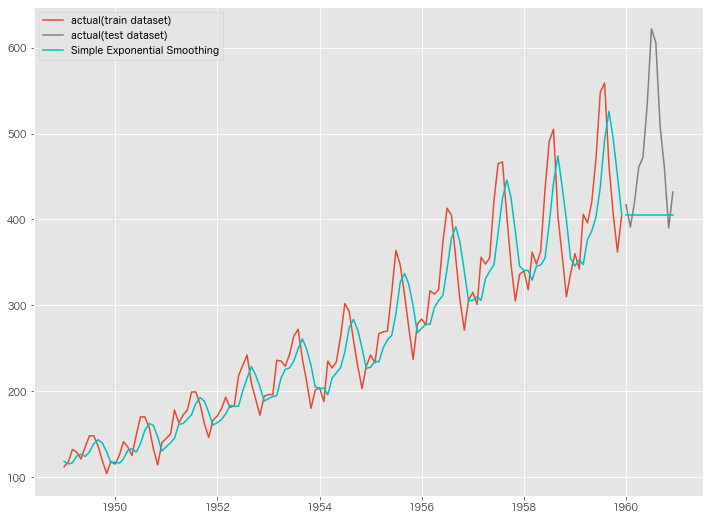

In [24]:
# グラフ化
fig, ax = plt.subplots()
ax.plot(train.index, train.values, label="actual(train dataset)")
ax.plot(test.index, test.values, label="actual(test dataset)", color="gray")
ax.plot(train.index, SES_model_fit.fittedvalues, color="c")
ax.plot(test.index, SES_pred, label="Simple Exponential Smoothing", color="c") 
plt.legend()